### Plot _thornado_ data

Notebook for quick plotting of 2D _thornado_ data. 

---

To Do: Make it easier to select what to plot. Currently: Veyr Manual

In [1]:
import h5py    
import numpy as np  
import matplotlib.pyplot as plt

Data Directory. Simply change `simName` to the desired simulation. Later will likely have to modify.

In [2]:
simName = "Implosion"
dataDir = "../../data/"+simName

For now, manually specify the `fileNumber`. Possibly add in ways to automatically get the max.

In [9]:
fileNumber = "000009"
fileName = dataDir + '/' + simName + '_FluidFields_' + fileNumber + '.h5' 

Read the Data

In [10]:
with h5py.File(fileName, 'r') as f:
    for key in f.keys():
        print(key)
    
    time = f['Time'][:]
    x1 = f['/Spatial Grid/X1'][:]
    x2 = f['/Spatial Grid/X2'][:]
    x3 = f['/Spatial Grid/X3'][:]
    
    uAF_P  = f['/Fluid Fields/Auxiliary/Pressure'][:]
    uAF_T  = f['/Fluid Fields/Auxiliary/Temperature'][:]
    uAF_Ye = f['/Fluid Fields/Auxiliary/Electron Fraction'][:]
    uAF_S  = f['/Fluid Fields/Auxiliary/Entropy Per Baryon'][:]
    uAF_E  = f['/Fluid Fields/Auxiliary/Specific Internal Energy'][:]
    uAF_Me = f['/Fluid Fields/Auxiliary/Electron Chemical Potential'][:]
    uAF_Mp = f['/Fluid Fields/Auxiliary/Proton Chemical Potential'][:]
    uAF_Mn = f['/Fluid Fields/Auxiliary/Neutron Chemical Potential'][:]
    uAF_Yp = f['/Fluid Fields/Auxiliary/Proton Mass Fraction'][:]
    uAF_Yn = f['/Fluid Fields/Auxiliary/Neutron Mass Fraction'][:]
    uAF_Ya = f['/Fluid Fields/Auxiliary/Alpha Mass Fraction'][:]
    uAF_Yh = f['/Fluid Fields/Auxiliary/Heavy Mass Fraction'][:]
    uAF_Gm = f['/Fluid Fields/Auxiliary/Ratio of Specific Heats (Gamma)'][:]
    uAF_Cs = f['/Fluid Fields/Auxiliary/Sound Speed'][:]

Fluid Fields
Shock Detector
Spatial Grid
Time


Read the desired field into a numpy array.

In [11]:
data = np.zeros( (len(x1), len(x1)) )
print(time)
for i in range(0,768):
    for j in range(0,768):
        #data[i,j] = [ x1[i], x2[j], uAF_P[0][i][j] ]
        data[i,j] = uAF_P[0][i][j]

[0.0405]


Plot!

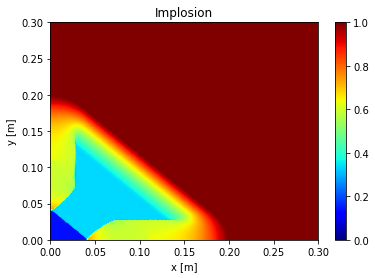

In [12]:
# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(x1, x2)



fig, ax = plt.subplots()

#vmin and vmax set the bounds of the colorbar
c = ax.pcolormesh(x, y, data, cmap='jet', vmin=0, vmax=1)
ax.set_title('Implosion')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()